In [5]:
import mne
import pybv
import mne_bids
import os
import numpy as np
from matplotlib import pyplot as plt
import scipy

In [8]:
#from https://stackoverflow.com/questions/7008608/scipy-io-loadmat-nested-structures-i-e-dictionaries
import scipy.io as spio

def loadmat(filename):
    '''
    this function should be called instead of direct spio.loadmat
    as it cures the problem of not properly recovering python dictionaries
    from mat files. It calls the function check keys to cure all entries
    which are still mat-objects
    '''
    data = spio.loadmat(filename, struct_as_record=False, squeeze_me=True)
    return _check_keys(data)

def _check_keys(dict):
    '''
    checks if entries in dictionary are mat-objects. If yes
    todict is called to change them to nested dictionaries
    '''
    for key in dict:
        if isinstance(dict[key], spio.matlab.mio5_params.mat_struct):
            dict[key] = _todict(dict[key])
    return dict        

def _todict(matobj):
    '''
    A recursive function which constructs from matobjects nested dictionaries
    '''
    dict = {}
    for strg in matobj._fieldnames:
        elem = matobj.__dict__[strg]
        if isinstance(elem, spio.matlab.mio5_params.mat_struct):
            dict[strg] = _todict(elem)
        else:
            dict[strg] = elem
    return dict


def read_BIDS_data(PATH_RUN, BIDS_PATH):
    """Given a run path and bids data path, read the respective data
    Parameters
    ----------
    PATH_RUN : string
    BIDS_PATH : string
    Returns
    -------
    raw_arr : mne.io.RawArray
    raw_arr_data : np.ndarray
    fs : int
    line_noise : int
    """
    entities = mne_bids.get_entities_from_fname(PATH_RUN)

    bids_path = mne_bids.BIDSPath(subject=entities["subject"],
                                  session=entities["session"],
                                  task=entities["task"],
                                  run=entities["run"],
                                  acquisition=entities["acquisition"],
                                  datatype="ieeg", root=BIDS_PATH)
    print(bids_path)
    raw_arr = mne_bids.read_raw_bids(bids_path)

    return (raw_arr, raw_arr.get_data(), int(np.ceil(raw_arr.info["sfreq"])),
            int(raw_arr.info["line_freq"]))

In [36]:
BIDS_PATH = r"C:\Users\ICN_admin\OneDrive - Charité - Universitätsmedizin Berlin\Data\BIDS_Berlin_ECOG_LFP\rawdata"
PATH_RUN = r"C:\Users\ICN_admin\OneDrive - Charité - Universitätsmedizin Berlin\Data\BIDS_Berlin_ECOG_LFP\rawdata\sub-005\ses-EphysMedOff01\ieeg\sub-005_ses-EphysMedOff01_task-BlockRotationL_acq-StimOff_run-01_ieeg.vhdr"

In [40]:
PATH_RUN = r"C:\Users\ICN_admin\OneDrive - Charité - Universitätsmedizin Berlin\Data\BIDS_Berlin_ECOG_LFP\rawdata\sub-006\ses-EphysMedOff02\ieeg\sub-006_ses-EphysMedOff02_task-ReadRelaxMoveL_acq-StimOff_run-01_ieeg.vhdr"

In [46]:
BIDS_PATH

'C:\\Users\\ICN_admin\\OneDrive - Charité - Universitätsmedizin Berlin\\Data\\BIDS_Berlin_ECOG_LFP\\rawdata'

In [47]:
PATH_RUN

'C:\\Users\\ICN_admin\\OneDrive - Charité - Universitätsmedizin Berlin\\Data\\BIDS_Berlin_ECOG_LFP\\rawdata\\sub-006\\ses-EphysMedOff02\\ieeg\\sub-006_ses-EphysMedOff02_task-ReadRelaxMoveL_acq-StimOff_run-01_ieeg.vhdr'

In [48]:
mne_bids.__version__

'0.8'

In [49]:
entities = mne_bids.get_entities_from_fname(PATH_RUN)

bids_path = mne_bids.BIDSPath(subject=entities["subject"],
                              session=entities["session"],
                              task=entities["task"],
                              run=entities["run"],
                              acquisition=entities["acquisition"],
                              datatype="ieeg", root=BIDS_PATH)
print(bids_path)

C:/Users/ICN_admin/OneDrive - Charité - Universitätsmedizin Berlin/Data/BIDS_Berlin_ECOG_LFP/rawdata/sub-006/ses-EphysMedOff02/ieeg/sub-006_ses-EphysMedOff02_task-ReadRelaxMoveL_acq-StimOff_run-01_ieeg.vhdr


In [50]:
mne_bids.read_raw_bids(bids_path)

Extracting parameters from C:\Users\ICN_admin\OneDrive - Charité - Universitätsmedizin Berlin\Data\BIDS_Berlin_ECOG_LFP\rawdata\sub-006\ses-EphysMedOff02\ieeg\sub-006_ses-EphysMedOff02_task-ReadRelaxMoveL_acq-StimOff_run-01_ieeg.vhdr...
Setting channel info structure...
Reading channel info from C:\Users\ICN_admin\OneDrive - Charité - Universitätsmedizin Berlin\Data\BIDS_Berlin_ECOG_LFP\rawdata\sub-006\ses-EphysMedOff02\ieeg\sub-006_ses-EphysMedOff02_task-ReadRelaxMoveL_acq-StimOff_run-01_channels.tsv.
Reading in coordinate system frame Other: None.
Reading electrode coords from C:\Users\ICN_admin\OneDrive - Charité - Universitätsmedizin Berlin\Data\BIDS_Berlin_ECOG_LFP\rawdata\sub-006\ses-EphysMedOff02\ieeg\sub-006_ses-EphysMedOff02_electrodes.tsv.
The read in electrodes file is: 
 [('name', ['LFP_R_1_STN_MT', 'LFP_R_2_STN_MT', 'LFP_R_3_STN_MT', 'LFP_R_4_STN_MT', 'LFP_R_5_STN_MT', 'LFP_R_6_STN_MT', 'LFP_R_7_STN_MT', 'LFP_R_8_STN_MT', 'LFP_L_1_STN_MT', 'LFP_L_2_STN_MT', 'LFP_L_3_STN_MT

C:\Users\ICN_admin\Anaconda3\envs\pyneuromodulation\lib\site-packages\mne_bids\path.py:1303: RuntimeWarning: Did not find any events.tsv associated with sub-006_ses-EphysMedOff02_task-ReadRelaxMoveL_acq-StimOff_run-01.

The search_str was "C:\Users\ICN_admin\OneDrive - Charité - Universitätsmedizin Berlin\Data\BIDS_Berlin_ECOG_LFP\rawdata\sub-006\**\sub-006_ses-EphysMedOff02*events.tsv"
  warn(msg)
C:\Users\ICN_admin\Anaconda3\envs\pyneuromodulation\lib\site-packages\mne_bids\dig.py:467: RuntimeWarning: Defaulting coordinate frame to unknown from coordinate system input Other
  warn(f"Defaulting coordinate frame to unknown "
C:\Users\ICN_admin\Anaconda3\envs\pyneuromodulation\lib\site-packages\mne_bids\dig.py:521: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  raw.set_montage(montage, on_missing='warn', verbose=verbose)
C:\Users\ICN_admin\Anaconda3\envs\pyneuromodulation\lib\site-packages\mne_bids\dig.py:521: RuntimeWarning: DigMonta

<RawBrainVision | sub-006_ses-EphysMedOff02_task-ReadRelaxMoveL_acq-StimOff_run-01_ieeg.eeg, 33 x 1921185 (480.3 s), ~52 kB, data not loaded>

In [ ]:
raw_arr, data, fs, line_noise = read_BIDS_data(PATH_DATA, BIDS_PATH)

In [3]:
dat = loadmat("data.mat")

In [5]:
dat["data"]["trial"].shape

(38, 1921185)

In [10]:
dat["data"]["fsample"]

4000

In [12]:
dat["data"]["label"]

array(['LFPR1STNM', 'LFPR2STNM', 'LFPR3STNM', 'LFPR4STNM', 'LFPR5STNM',
       'LFPR6STNM', 'LFPR7STNM', 'LFPR8STNM', 'LFPL1STNM', 'LFPL2STNM',
       'LFPL3STNM', 'LFPL4STNM', 'LFPL5STNM', 'LFPL6STNM', 'LFPL7STNM',
       'LFPL8STNM', 'ECXR1SM_A', 'ECXR2SM_A', 'ECXR3SM_A', 'ECXR4SM_A',
       'ECXR5SM_A', 'ECXR6SM_A', 'EEGC1Cz_T', 'EEGC1Fz_T', 'BIP 01',
       'BIP 02', 'BIP 03', 'X', 'Y', 'Z', 'X', 'Y', 'Z', 'ISO aux',
       'ISO aux', 'AUX 3-3', 'STATUS', 'Counter 2power24'], dtype=object)

In [18]:
dat["data"]["label"][24]

'BIP 01'

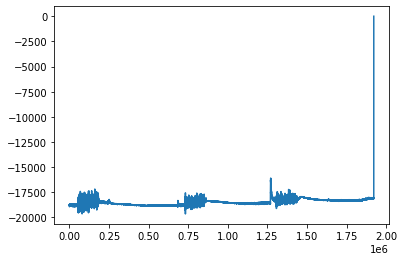

In [65]:
plt.plot(dat["data"]["trial"][25,:])

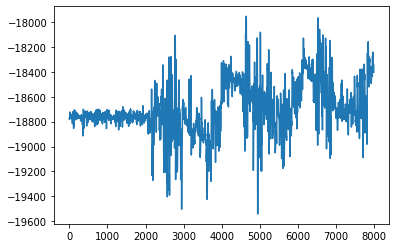

In [113]:
plt.plot(dat["data"]["trial"][25,52000:60000])

In [115]:
dat["data"]["trial"].shape[1]

1921185

In [116]:
time_ = np.arange(0, dat["data"]["trial"].shape[1], 1)/4000
label_ = np.zeros(dat["data"]["trial"].shape[1]) # CODE: 0 - prep, 1 - mov, 2 - rest, 3 - speech


In [117]:
START_INDEX_MOV = 52000
TIME_START = time_[START_INDEX_MOV]

In [118]:
TIME_START

13.0

In [120]:
MOV_SEGMENT_0 = np.array([135451, 135481]) - 135451 + TIME_START
MOV_SEGMENT_1 = np.array([135618, 135648]) - 135451 + TIME_START
MOV_SEGMENT_2 = np.array([135762, 135792]) - 135451 + TIME_START

for seg in [MOV_SEGMENT_0, MOV_SEGMENT_1, MOV_SEGMENT_2]:
    label_[np.where((time_ > seg[0]) & (time_ < seg[1]))[0]] = 1
    
REST_SEGMENT_0 = np.array([135500, 135530]) - 135451 + TIME_START
REST_SEGMENT_1 = np.array([135662, 135693]) - 135451 + TIME_START
REST_SEGMENT_2 = np.array([135807, 135837]) - 135451 + TIME_START

for seg in [REST_SEGMENT_0, REST_SEGMENT_1, REST_SEGMENT_2]:
    label_[np.where((time_ > seg[0]) & (time_ < seg[1]))[0]] = 2
    
SPEECH_SEGMENT_0 = np.array([135553, 135598]) - 135451 + TIME_START
SPEECH_SEGMENT_1 = np.array([135707, 135745]) - 135451 + TIME_START
SPEECH_SEGMENT_2 = np.array([135853, 135899]) - 135451 + TIME_START

for seg in [SPEECH_SEGMENT_0, SPEECH_SEGMENT_1, SPEECH_SEGMENT_2]:
    label_[np.where((time_ > seg[0]) & (time_ < seg[1]))[0]] = 3

Text(0.5, 1.0, '0-prep, 1-mov, 2-rest, 3-speech')

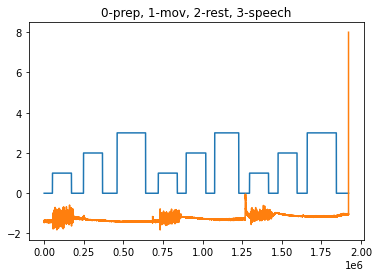

In [128]:
plt.plot(label_, label='label')
plt.plot(dat["data"]["trial"][25,:]/2000+8, label="EMG")
#plt.legend()
plt.title("0-prep, 1-mov, 2-rest, 3-speech")

In [133]:
1/(time_[1]-time_[0])

4000.0

In [136]:
dict_out = {"time" : time_.tolist(), 
            "label" : label_.tolist(), 
            "description" : "0-prep, 1-mov, 2-rest, 3-speech"
           }

In [137]:
import json

with open('sub-006_ses-EphysMedOff02_task-movrestspeech_run-0_ieeg_label.json', 'w') as fp:
    json.dump(dict_out, fp)

In [80]:
ch_labels = ["LFP_BS_STN_R_1", "LFP_BS_STN_R_2","LFP_BS_STN_R_3","LFP_BS_STN_R_4",
          "LFP_BS_STN_R_5","LFP_BS_STN_R_6","LFP_BS_STN_R_7","LFP_BS_STN_R_8",
          "LFP_BS_STN_L_1", "LFP_BS_STN_L_2","LFP_BS_STN_L_3","LFP_BS_STN_L_4",
          "LFP_BS_STN_L_5","LFP_BS_STN_L_6","LFP_BS_STN_L_7","LFP_BS_STN_L_8",
          "ECOG_AT_SM_R_1", "ECOG_AT_SM_R_2", 
          "ECOG_AT_SM_RR_3", "ECOG_AT_SM_R_4", "ECOG_AT_SM_R_5", "ECOG_AT_SM_R_6",
          "EEG_TM_Cz__1", "EEG_TM_Fz__2", "EMG_1", "BIP02", "BIP03",
          'X', 'Y', 'Z', 'X_', 'Y_', 'Z_', 'ISO aux',
          'ISO aux_', 'AUX 3-3', 'STATUS', 'Counter 2power24']

In [81]:
BIDS_path = "C:\\Users\\ICN_admin\\Documents\\WRITE_BERLIN_BIDS\\neu_hier\\"
subject_id = "006"
session = "EphysMedOff02"
task = "movrestspeech"
run = "0"
fsample = dat["data"]["fsample"]
ieegdata = dat["data"]["trial"]

In [82]:
info = mne.create_info(ch_labels, fsample, ch_types='ecog')
raw = mne.io.RawArray(ieegdata, info)

Creating RawArray with float64 data, n_channels=38, n_times=1921185
    Range : 0 ... 1921184 =      0.000 ...   480.296 secs
Ready.


In [83]:
pybv.write_brainvision?

In [84]:
bids_basename = mne_bids.BIDSPath(subject=subject_id, session=session, \
                                            task=task, run=run, root=BIDS_path)
pybv.write_brainvision(data=ieegdata, sfreq=fsample, ch_names=ch_labels, fname_base='dummy_write',
                       folder_out=os.getcwd())

In [85]:
bv_raw = mne.io.read_raw_brainvision('dummy_write.vhdr')

Extracting parameters from dummy_write.vhdr...
Setting channel info structure...


In [86]:
ch

37

In [87]:
mapping = {}
for ch in range(len(bv_raw.info['ch_names'])):
    #if 'ECOG' in bv_raw.info['ch_names'][ch]: 
    #    mapping[bv_raw.info['ch_names'][ch]] = 'ecog'
    #elif 'LFP' in bv_raw.info['ch_names'][ch]:
    #    mapping[bv_raw.info['ch_names'][ch]] = 'dbs'
    #else:
    #    mapping[bv_raw.info['ch_names'][ch]] = 'misc'
    ch_name = bv_raw.info['ch_names'][ch]
    if ch_name.startswith('ECOG'):
        mapping[ch_name] = 'ecog'
    elif ch_name.startswith(('LFP', 'STN')):
        mapping[ch_name] = 'seeg'
    elif ch_name.startswith('EMG'):
        mapping[ch_name] = 'emg'
    # mne_bids cannot handle both eeg and ieeg channel types in the same data
    elif ch_name.startswith('EEG'):
        mapping[ch_name] = 'misc'
    elif ch_name.startswith(('MOV', 'ANALOG', 'ROT', 'ACC', 'AUX', 'X', 'Y', 'Z')):
        mapping[ch_name] = 'misc'
    else:
        mapping[ch_name] = 'misc'
bv_raw.set_channel_types(mapping)

<RawBrainVision | dummy_write.eeg, 38 x 1921185 (480.3 s), ~43 kB, data not loaded>

In [88]:
bv_raw.get_channel_types()

['seeg',
 'seeg',
 'seeg',
 'seeg',
 'seeg',
 'seeg',
 'seeg',
 'seeg',
 'seeg',
 'seeg',
 'seeg',
 'seeg',
 'seeg',
 'seeg',
 'seeg',
 'seeg',
 'ecog',
 'ecog',
 'ecog',
 'ecog',
 'ecog',
 'ecog',
 'misc',
 'misc',
 'emg',
 'misc',
 'misc',
 'misc',
 'misc',
 'misc',
 'misc',
 'misc',
 'misc',
 'misc',
 'misc',
 'misc',
 'misc',
 'misc']

In [89]:
bids_basename

BIDSPath(
root: C:/Users/ICN_admin/Documents/WRITE_BERLIN_BIDS/neu_hier
datatype: None
basename: sub-006_ses-EphysMedOff02_task-movrestspeech_run-0)

In [90]:
mne_bids.__version__

'0.8'

In [91]:
bv_raw

<RawBrainVision | dummy_write.eeg, 38 x 1921185 (480.3 s), ~43 kB, data not loaded>

In [92]:
bv_raw.info['line_freq'] = 50
mne_bids.write_raw_bids(bv_raw, bids_path=bids_basename, overwrite=True)

#  remove dummy file
os.remove('dummy_write.vhdr')
os.remove('dummy_write.eeg')
os.remove('dummy_write.vmrk')



Extracting parameters from C:\Users\ICN_admin\Documents\Decoding_Toolbox\sub006\dummy_write.vhdr...
Setting channel info structure...

Writing 'C:\Users\ICN_admin\Documents\WRITE_BERLIN_BIDS\neu_hier\README'...

References
----------
Appelhoff, S., Sanderson, M., Brooks, T., Vliet, M., Quentin, R., Holdgraf, C., Chaumon, M., Mikulan, E., Tavabi, K., Höchenberger, R., Welke, D., Brunner, C., Rockhill, A., Larson, E., Gramfort, A. and Jas, M. (2019). MNE-BIDS: Organizing electrophysiological data into the BIDS format and facilitating their analysis. Journal of Open Source Software 4: (1896). https://doi.org/10.21105/joss.01896

Holdgraf, C., Appelhoff, S., Bickel, S., Bouchard, K., D'Ambrosio, S., David, O., … Hermes, D. (2019). iEEG-BIDS, extending the Brain Imaging Data Structure specification to human intracranial electrophysiology. Scientific Data, 6, 102. https://doi.org/10.1038/s41597-019-0105-7


Writing 'C:\Users\ICN_admin\Documents\WRITE_BERLIN_BIDS\neu_hier\participants.tsv'...

C:\Users\ICN_admin\Anaconda3\envs\pyneuromodulation\lib\site-packages\mne_bids\read.py:164: RuntimeWarning: No events found or provided. Please add annotations to the raw data, or provide the events_data and event_id parameters. For resting state data, BIDS recommends naming the task using labels beginning with "rest".
  warn('No events found or provided. Please add annotations to the raw '



Writing 'C:\Users\ICN_admin\Documents\WRITE_BERLIN_BIDS\neu_hier\sub-006\ses-EphysMedOff02\sub-006_ses-EphysMedOff02_scans.tsv'...

filename	acq_time
ieeg/sub-006_ses-EphysMedOff02_task-movrestspeech_run-0_ieeg.vhdr	n/a
Wrote C:\Users\ICN_admin\Documents\WRITE_BERLIN_BIDS\neu_hier\sub-006\ses-EphysMedOff02\sub-006_ses-EphysMedOff02_scans.tsv entry with ieeg\sub-006_ses-EphysMedOff02_task-movrestspeech_run-0_ieeg.vhdr.


In [93]:
### check read now

In [94]:
PATH_RUN = r"C:\Users\ICN_admin\OneDrive - Charité - Universitätsmedizin Berlin\Data\BIDS_Berlin_ECOG_LFP\rawdata\sub-006\ses-EphysMedOff02\ieeg\sub-006_ses-EphysMedOff02_task-movrestspeech_run-0_ieeg.vhdr"

In [96]:
bids_basename = mne_bids.BIDSPath(subject=subject_id, session=session, \
                                            task=task, run=run,
                        root=r"C:\Users\ICN_admin\OneDrive - Charité - Universitätsmedizin Berlin\Data\BIDS_Berlin_ECOG_LFP\rawdata")

In [97]:
out_ = mne_bids.read_raw_bids(bids_basename)

Extracting parameters from C:\Users\ICN_admin\OneDrive - Charité - Universitätsmedizin Berlin\Data\BIDS_Berlin_ECOG_LFP\rawdata\sub-006\ses-EphysMedOff02\ieeg\sub-006_ses-EphysMedOff02_task-movrestspeech_run-0_ieeg.vhdr...
Setting channel info structure...
Reading channel info from C:\Users\ICN_admin\OneDrive - Charité - Universitätsmedizin Berlin\Data\BIDS_Berlin_ECOG_LFP\rawdata\sub-006\ses-EphysMedOff02\ieeg\sub-006_ses-EphysMedOff02_task-movrestspeech_run-0_channels.tsv.


C:\Users\ICN_admin\Anaconda3\envs\pyneuromodulation\lib\site-packages\mne_bids\path.py:1303: RuntimeWarning: Did not find any events.tsv associated with sub-006_ses-EphysMedOff02_task-movrestspeech_run-0.

The search_str was "C:\Users\ICN_admin\OneDrive - Charité - Universitätsmedizin Berlin\Data\BIDS_Berlin_ECOG_LFP\rawdata\sub-006\**\sub-006_ses-EphysMedOff02*events.tsv"
  warn(msg)


In [99]:
out_.get_data().shape

(38, 1921185)